Final Project

Is There a Correlation between Crisis Line Call Volume and MCOT Outreaches?

Abstract (No more than 250 words)

Are Crisis Line call volumes at the University of Utah Neuropsychiatric Institute's (UNI) Crisis Line correlated with the number of outreaches the UNI Mobile Crisis Outreach Team (MCOT) respond to?  This is the question I wanted to know the answer to and the topic of this project.  MCOT responds to calls anywhere in Salt Lake County from multiple requesting sources: police, family, friends, co-workers, other healthcare/mental health workers, and service providers in the community.  The Crisis Line receives calls from the whole state of Utah.

Introduction:
    Data
    Hypothesis

The idea of having a mobile crisis outreach team is not a new one; many cities, counties, and states have been adding them in recent years.  However, an actual count of teams in the United States was not found, but performing a "Google" search for the following: "mobile crisis outreach teams", results in links to pages regarding MCOT teams from all over the country.  In addition to not being able to locate a count of the number teams, there did not appear to be any available information regarding the statistics of if the number of outreaches are correlated to the number of crisis calls received within a certain jurisdiction.  That being the case, there was no prior data to compare the results in this project to.  The hypothesis tested, using the "R" programming language, was: "Is there a statistical significant level of correlation between the number of crisis calls received by the UNI Crisis Line and the number of outreaches that the UNI MCOT team responds to?"  The null hypothesis, thus being: "There is no significant correlation between the number of crisis calls received by the UNI Crisis Line and the number of outreaches that the UNI MCOT team responds to."  The data used in this project was obtained from the web-based software that both the UNI Crisis Line and UNI MCOT use to record call information in, https://www.icarol.com.  The data contains number of calls and number of outreaches from March 1, 2012 (the month the UNI Mobile Crisis Outreach Team first started) to March 31, 2018.  In total the data covers 2,222 days, the sum of Crisis Line calls for this period totals 241,354, and the sum for number of MCOT outreaches totals 21,442.  There were zero days where the Crisis Line took 0 calls and 49 days that MCOT had zero outreaches(nearly all of these days occurred within the first two months of the data, as the program was just launched in the month of March 2012).  The maximum number of calls for the Crisis Line was 191 calls, which occurred on March 12, 2018, and the maximum number of outreaches for MCOT was 29, which occurred on September 22, 2016; the mean number of calls for Crisis Line was 108.6 and the mean for MCOT was 9.65.  The minimum number of calls for Crisis line was 59 and MCOT was 0.  

Methods:
    Descriptive Statistics
    Tests

In [20]:
#install and load necessary packages
library(gtools)
install.packages("mosaic")
library(mosaic)
require(ggplot2)
require(sandwich)
require(msm)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
#read in my data files
MCOT = read.csv(file = "MCOT outreach data from March 1 2012 to March 31 2018.csv", header = F)
Crisis = read.csv(file = "Crisis Line data from March 1 2012 to March 31 2018.csv", header = F)
#give the columns names
colnames(MCOT) <- c("Date", "MCOT_Calls")
colnames(Crisis) <- c("Date", "Crisis_Calls")
#subset the Crisis line file to get rid of the column that is in both MCOT and Crisis: "Date"
Crisis_1 <- subset(Crisis, select = -c(Date))
#combine the two files
MCOTandCrisis = cbind(MCOT, Crisis_1 )

Warning message in xy.coords(x, y, xlabel, ylabel, log = log):
“NAs introduced by coercion”Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”

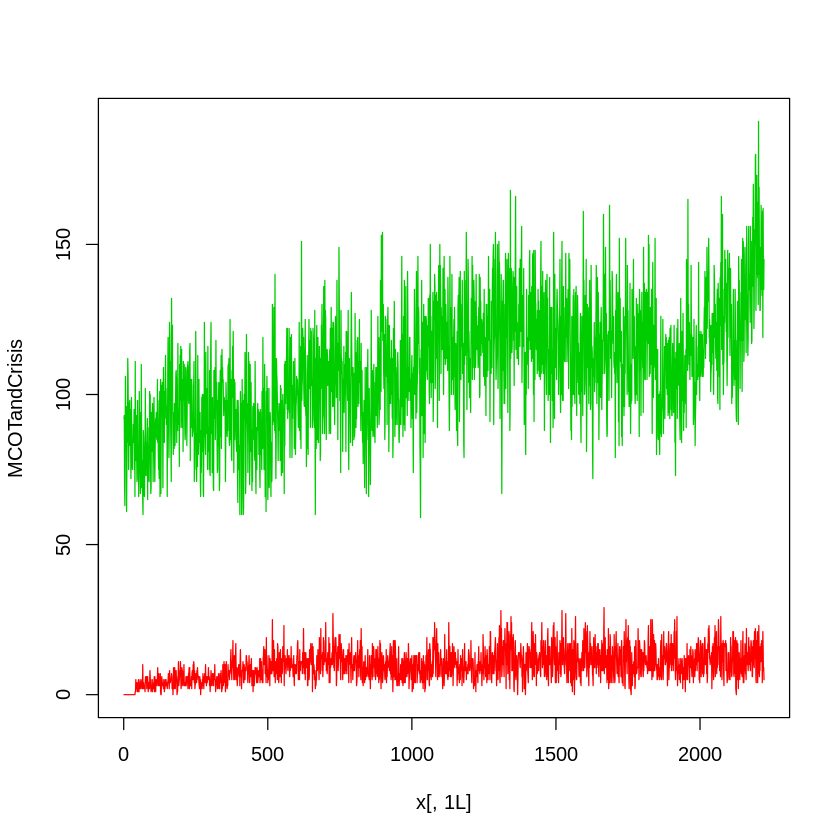

In [3]:
#take an initial look at the data by plotting the two variables
matplot(y = MCOTandCrisis, type = 'l', lty = 1)

In [4]:
#get the total number of days covered in the data
length(MCOTandCrisis$Date)

[1] 2222

In [5]:
#get the total sum of all Crisis Calls and MCOT outreaches
sum(MCOTandCrisis$Crisis_Calls)
sum(MCOTandCrisis$MCOT_Calls)

[1] 241354

[1] 21442

In [6]:
#count of how many days where Crisis Line and MCOT took 0 calls/0 outreaches
count(MCOTandCrisis$Crisis_Calls == 0)
count(MCOTandCrisis$MCOT_Calls == 0)

TRUE 
   0

TRUE 
  49

In [7]:
#find which day the max values occurred for Crisis and MCOT
which.max(MCOTandCrisis$Crisis_Calls)
which.max(MCOTandCrisis$MCOT_Calls)

[1] 2203

[1] 1667

In [8]:
#Show the results for the corresponding index for max value for both Crisis and MCOT
print(MCOTandCrisis[2203,])
print(MCOTandCrisis[1667,])

          Date MCOT_Calls Crisis_Calls
2203 3/12/2018         17          191
          Date MCOT_Calls Crisis_Calls
1667 9/22/2016         29          118


In [9]:
#summarize the combined data
summary(MCOTandCrisis)

       Date        MCOT_Calls     Crisis_Calls  
 1/1/2013:   1   Min.   : 0.00   Min.   : 59.0  
 1/1/2014:   1   1st Qu.: 6.00   1st Qu.: 94.0  
 1/1/2015:   1   Median : 9.00   Median :108.5  
 1/1/2016:   1   Mean   : 9.65   Mean   :108.6  
 1/1/2017:   1   3rd Qu.:13.00   3rd Qu.:122.0  
 1/1/2018:   1   Max.   :29.00   Max.   :191.0  
 (Other) :2216                                  

In [10]:
#perform a poisson regression (because the data is on counts) on the two variables, perform a summary of the
#poisson regression, and put it into a new object to be used later
summary(m1 <- glm(MCOT_Calls ~ Crisis_Calls, data = MCOTandCrisis, family="poisson"))


Call:
glm(formula = MCOT_Calls ~ Crisis_Calls, family = "poisson", 
    data = MCOTandCrisis)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.5849  -1.1836  -0.1501   0.8955   5.1889  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.8819926  0.0385443   22.88   <2e-16 ***
Crisis_Calls 0.0124610  0.0003336   37.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 6675.5  on 2221  degrees of freedom
Residual deviance: 5303.9  on 2220  degrees of freedom
AIC: 13987

Number of Fisher Scoring iterations: 5


In [11]:
#Calculate the robust standard errors and calculate the p-value, also calculated the 95% confidence interval

#perform a goodness of fit test with the residual deviance to see if the data fits the model, also calculate
#the lower and upper limits with a 95% confidence interval
cov.m1 <- vcovHC(m1, type="HC0")
std.err <- sqrt(diag(cov.m1))
r.est <- cbind(Estimate= coef(m1), "Robust SE" = std.err,
"Pr(>|z|)" = 2 * pnorm(abs(coef(m1)/std.err), lower.tail=FALSE),
LL = coef(m1) - 1.96 * std.err,
UL = coef(m1) + 1.96 * std.err)

r.est

,Estimate,Robust SE,Pr(>|z|),LL,UL
(Intercept),0.88199261,0.055091917,1.097338e-57,0.77401245,0.98997277
Crisis_Calls,0.01246105,0.000471533,6.766013e-154,0.01153684,0.01338525


In [12]:
#perform a goodness of fit test with the residual deviance to see if the data fits the model, also calculate
#the lower and upper limits with a 95% confidence interval
with(m1, cbind(res.deviance = deviance, df = df.residual,
  p = pchisq(deviance, df.residual, lower.tail=FALSE)))

res.deviance,df,p
5303.882,2220,1.336443e-252


In [13]:
#The calculated p value was highly significant, thus indicating that the model was not a good fit.(3)
#conduct an Analysis of Variance test on the data
fit <- aov(MCOT_Calls ~ Crisis_Calls, data=MCOTandCrisis)
fit

Call:
   aov(formula = MCOT_Calls ~ Crisis_Calls, data = MCOTandCrisis)

Terms:
                Crisis_Calls Residuals
Sum of Squares      13476.94  46722.65
Deg. of Freedom            1      2220

Residual standard error: 4.587618
Estimated effects may be unbalanced

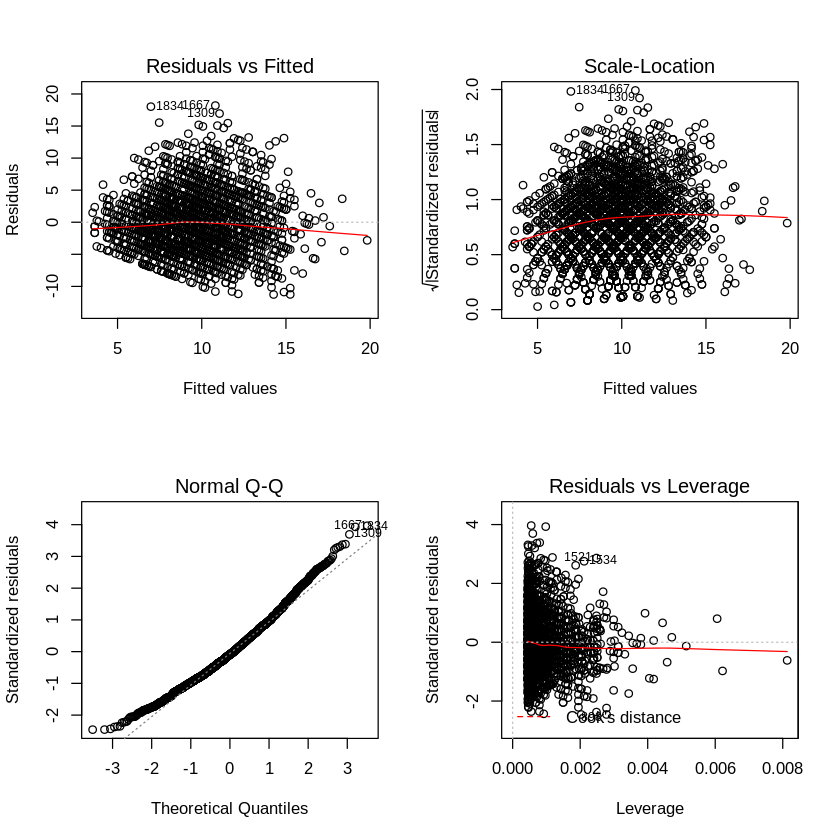

In [14]:
#plot the aov to determine correct model
layout(matrix(c(1,2,3,4),2,2)) # optional layout 
plot(fit) # diagnostic plots

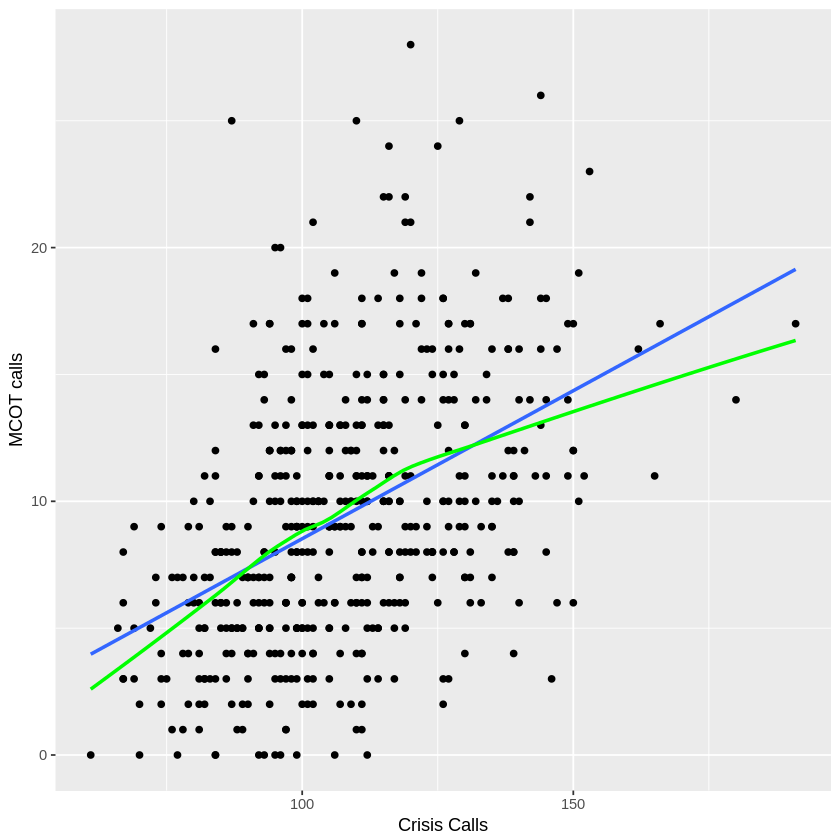

In [15]:
#The data fits a normal q-q plot best.  Plot the data as a normal q-q plot.
MCOTandCrisis %>%
sample(500) %>%
ggplot(aes(x = Crisis_Calls, y = MCOT_Calls)) +
geom_point() + 
stat_smooth(method = lm, se = 0) + 
stat_smooth(method = loess, se = 0, color = "green") + 
xlab("Crisis Calls") + ylab("MCOT calls")

In [16]:
#perform a correlation test using the pearson method which measures linear correlation between two variables
#the resulting values are between -1, 0, and 1; where -1 means there is total negative linear correlation,
#0 means that ther is no correlation, and 1 means there is total positve linear correlation.(1) 
cor_res <- cor.test(MCOTandCrisis$MCOT_Calls, MCOTandCrisis$Crisis_Calls, 
                method = "pearson")
cor_res


	Pearson's product-moment correlation

data:  x and y
t = 25.305, df = 2220, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4402283 0.5048013
sample estimates:
      cor 
0.4731501 


In [17]:
#create new variable for the linear regression of the data and calculate it's coefficients
mod <- lm(MCOT_Calls~Crisis_Calls, data = MCOTandCrisis) 
coef(mod)

(Intercept) Crisis_Calls 
  -3.7655309    0.1235074

In [18]:
#calculate the r squared of the new variable for linear regression of the data.
#"R-squared is the fraction by which the variance of the errors is less than the variance of the dependent variable."
#-(2)
rsquared(mod) 

[1] 0.223871

In [19]:
#provide a summary of the mod variable for linear regression of the data
summary(mod)


Call:
lm(formula = MCOT_Calls ~ Crisis_Calls, data = MCOTandCrisis)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2666  -3.3472  -0.4259   2.8092  18.1917 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.765531   0.539005  -6.986 3.72e-12 ***
Crisis_Calls  0.123507   0.004881  25.305  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.588 on 2220 degrees of freedom
Multiple R-squared:  0.2239,	Adjusted R-squared:  0.2235 
F-statistic: 640.3 on 1 and 2220 DF,  p-value: < 2.2e-16


Results - Conclusion

The hypothesis that there is a correlation between the number of calls taken by the UNI Crisis Line and the number of outreaches performed by UNI MCOT was correct, meaning that there was statistically significant correlation between these two variables.  The Pearson's correlation was highly significant and indicated a correlation of approximately 0.4732, or nearly a 50% positive correlation for number of outreaches to number of crisis calls.  The Pearson correlation on the variables showed a 95% confidence interval for correlation to be between 0.4402 and 0.5048.  The R-squared value, which is used to determine what percent of the variance is explained by the model, was 0.2239.  The adjusted R-squared value, which looks at the standard error of the regression, was 0.2235.  Although there is correlation between the two variables, the variance only accounts for approsimately 22% of the correlation in the model.  This data suggests that there are likely other factors at play that contribute to the number of outreaches than just the call volume of the Crisis Line and would require further analysis.

What's next

Because Crisis Line call volumes only partially explain the correlation of number of outreaches for the UNI MCOT, more analysis looking at other variables would be required in order to better explain what else contributes to the number of outreaches performed.  A few of the variables that come to mind that may play a role are: staffing levels of both MCOT and the Crisis Line, staffing levels of the various police departments in the county of Salt Lake, police call volumes, hospital bed availability in the community, seasonal patterns, and weather conditions to name a few.

References

(1) Pearson correlation coefficient [Internet]. Wikipedia. Wikimedia Foundation; 2018 [cited 2018Apr29]. Available from: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

(2) Fuqua School of Business. [Internet]. What's a good value for R-squared? [cited 2018Apr29]. Available from: https://people.duke.edu/~rnau/rsquared.htm

(3) Poisson Regression | R Data Analysis Examples [Internet]. IDRE Stats. [cited 2018Apr28]. Available from: https://stats.idre.ucla.edu/r/dae/poisson-regression/